In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [141]:
from google.colab import drive

drive.mount('/content/drive')
csv_file_path = '/content/drive/My Drive/ML_Colab/merged_apple_price_news.csv'
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path)
print('Shape: ', df.shape)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape:  (6165, 9)


,Date,Close,High,Low,Open,Volume,embedding,SMA_200,EMA_50
0,2000-01-03,0.844981,0.849227,0.767607,0.791669,535796800,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.799947,0.835547
1,2000-01-04,0.773740,0.835073,0.763833,0.817145,512377600,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.799947,0.835547
2,2000-01-05,0.785063,0.834601,0.777515,0.783176,778321600,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.799947,0.835547
3,2000-01-06,0.717125,0.807709,0.717125,0.801105,767972800,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.799947,0.835547
4,2000-01-07,0.751094,0.762417,0.720900,0.728448,460734400,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.799947,0.835547
...,...,...,...,...,...,...,...,...,...
6160,2024-06-28,210.619995,216.070007,210.300003,215.770004,82542700,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,183.323794,195.344996
6161,2024-07-01,216.750000,217.509995,211.919998,212.089996,60402900,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,183.539925,196.184407
6162,2024-07-02,220.270004,220.380005,215.100006,216.149994,58046200,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,183.766037,197.128941
6163,2024-07-03,221.550003,221.550003,219.029999,220.000000,37369800,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,184.002184,198.086629


## 5. Pre-procesamiento

Implica:

1. Partición en train/val/test (80%, 10%, 10%)
2. Generación del dataset supervisado: entrada y salida del modelo
3. Escalamiento

Veamos cada una de estas fases.

In [142]:
# primero eliminamos las variables que sobran
df = df.drop(columns=['Date', 'SMA_200', 'EMA_50'])
df

,Close,High,Low,Open,Volume,embedding
0,0.844981,0.849227,0.767607,0.791669,535796800,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
1,0.773740,0.835073,0.763833,0.817145,512377600,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
2,0.785063,0.834601,0.777515,0.783176,778321600,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
3,0.717125,0.807709,0.717125,0.801105,767972800,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
4,0.751094,0.762417,0.720900,0.728448,460734400,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
...,...,...,...,...,...,...
6160,210.619995,216.070007,210.300003,215.770004,82542700,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
6161,216.750000,217.509995,211.919998,212.089996,60402900,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
6162,220.270004,220.380005,215.100006,216.149994,58046200,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
6163,221.550003,221.550003,219.029999,220.000000,37369800,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...


### 5.1. Partición del set en entrenamiento, validación y prueba

A diferencia de otros modelos de Machine Learning, en el caso de series de tiempo **se debe garantizar que se generan las particiones sin mezclar aleatoriamente los datos**.

Recordemos además que:
- El set de entrenamiento (*train*) se usará para encontrar los parámetros del modelo
- El set de validación (*val*) para verificar que no haya *under/over-fitting* del modelo y para ajustar sus hiperparámetros
- El set de prueba (*test*) para poner a prueba el mejor modelo encontrado durante el entrenamiento/validación

In [143]:
def train_val_test_split(dataframe, tr_size=0.8, vl_size=0.1, ts_size=0.1):
  """
  Split a time series into train, validation and test sets.
  """
  N = dataframe.shape[0]
  train_size = int(tr_size * N)
  val_size = int(vl_size * N)
  test_size = N - train_size - val_size

  train = dataframe[:train_size]
  val = dataframe[train_size:train_size + val_size]
  test = dataframe[train_size + val_size:]

  return train, val, test

In [144]:
tr, vl, ts = train_val_test_split(df)

print(f'Training set size: {tr.shape}')
print(f'Validation set size: {vl.shape}')
print(f'Testing set size: {ts.shape}')

Training set size: (4932, 6)
Validation set size: (616, 6)
Testing set size: (617, 6)


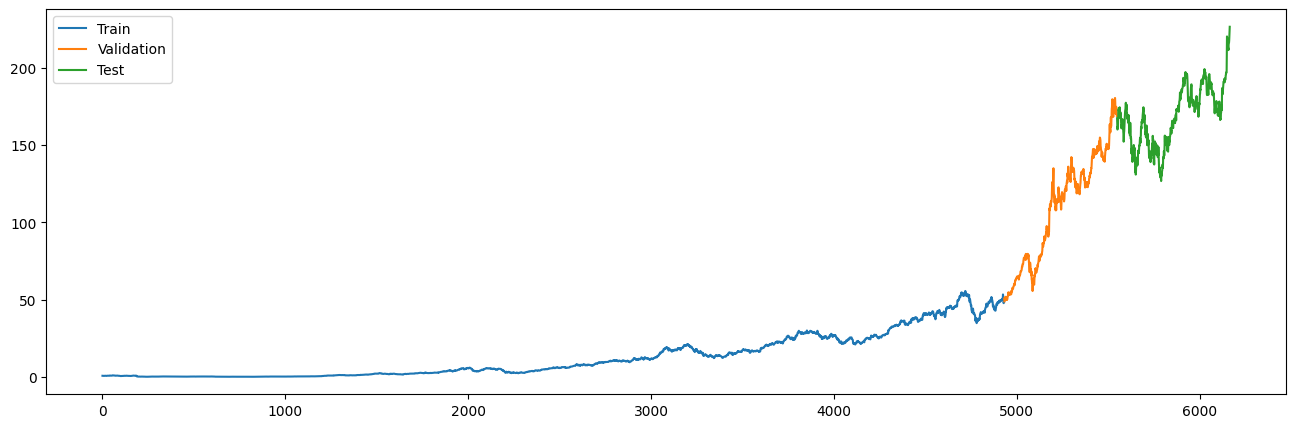

In [149]:
# Dibujar uno de las covariables
covar = 1
col = df.columns[covar]

fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(tr[col], label='Train')
ax.plot(vl[col], label='Validation')
ax.plot(ts[col], label='Test')
plt.legend()

In [151]:
def create_supervised_dataset(array: np.array, input_length: int, output_length: int):
  """
  Creates a supervised dataset with inputs (X) and outputs (Y) requires for LSTM networks.

  Args:
    array (numpy.ndarray): The input array with size N x features (N:amount of data, f: amount of features).
    input_length (int): Consecutive time instants of the time serie(s) used to feed the model
    output_length (int): Instants of time to be forecast (model output)

  Returns:
    numpy.ndarray: Instants of time to be forecast (model output)
  """

  X, Y = [], []
  shape = array.shape
  if len(shape) == 1:
    # we have a single time serie (univariado)
    rows, cols = array.shape[0], 1
    array = array.reshape(rows, cols)
  else:
    # we have multiple time series (multivariado)
    rows, cols = array.shape

  for i in range(rows - input_length - output_length):
    x = array[i:i + input_length, 0:cols]
    y = array[i + input_length:i + input_length + output_length, -1].reshape(output_length, 1)
    X.append(x)
    Y.append(y)

  X = np.array(X)
  Y = np.array(Y)

  return X, Y

In [152]:
INPUT_LENGTH = 12 # 12 days
OUTPUT_LENGTH = 4 # 4 days

x_tr, y_tr = create_supervised_dataset(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = create_supervised_dataset(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = create_supervised_dataset(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Training Set - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Validation Set - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Testing Set - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Training Set - x_tr: (4916, 12, 6), y_tr: (4916, 4, 1)
Validation Set - x_vl: (600, 12, 6), y_vl: (600, 4, 1)
Testing Set - x_ts: (601, 12, 6), y_ts: (601, 4, 1)


### 5.3 Escalamiento

Es requerido para garantizar que todas las características se encuentran en el mismo rango de valores, lo que facilita el entrenamiento del modelo y las predicciones:

In [153]:
from sklearn.preprocessing import MinMaxScaler

def scale_dataset(data_input, col_ref):
  '''Escala el dataset en el rango de -1 a 1.

  Entradas:
  - data_input: diccionario con los dataset de entrada y salida del modelo
  (data_input = {'x_tr':x_tr, 'y_tr':y_tr, 'x_vl':x_vl, 'y_vl':y_vl,
                  'y_ts':y_ts})
  - col_ref: parámetro adicional para especificar la columna que se predicirá

  Retorna:
  - data_scaled: diccionario con los datasets de entrada y salida escalados
    (tiene la misma estructura del diccionario de entrada)
  - scaler: el escalador usado (requerido para las predicciones)
  '''

  col_ref = df.columns.get_loc(col_ref)

  NSAMPLES = data_input['x_tr'].shape[1]
  NFEATS = data_input['x_tr'].shape[2]

  # Generar listado con "scalers" (en este caso, por ser sólo 1 característica
  # se tendrá sólo 1 escalador)
  scalers = [MinMaxScaler(feature_range=(-1,1)) for _ in range(NFEATS)]

  # Arreglos que contendrán los datasets escalados
  x_tr_s = np.zeros(data_input['x_tr'].shape)
  x_vl_s = np.zeros(data_input['x_vl'].shape)
  x_ts_s = np.zeros(data_input['x_ts'].shape)
  y_tr_s = np.zeros(data_input['y_tr'].shape)
  y_vl_s = np.zeros(data_input['y_vl'].shape)
  y_ts_s = np.zeros(data_input['y_ts'].shape)

  # Escalamiento: se usarán los min/max del set de entrenamiento para
  # escalar la totalidad de los datasets

  # Escalamiento Xs: en este caso debemos garantizar que cada dato de entrada
  # a fit_transform o transform debe ser de tamaño nsamples x nfeatures
  # (en este caso 24x13)
  for i in range(NFEATS):
    x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
    x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
    x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])

  # Escalamiento Ys
  y_tr_s[:,:,0] = scalers[col_ref].fit_transform(y_tr[:,:,0])
  y_vl_s[:,:,0] = scalers[col_ref].transform(y_vl[:,:,0])
  y_ts_s[:,:,0] = scalers[col_ref].transform(y_ts[:,:,0])

  # Conformar diccionario de salida
  data_scaled = {
      'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
      'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
      'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
  }

  return data_scaled, scalers[col_ref]

In [154]:
# Escalamiento del dataset con la función anterior

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar
data_s, scaler = scale_dataset(data_in, col_ref='Close')

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

# Verificación
print(f'Min x_tr/x_vl/x_ts sin escalamiento: {x_tr.min()}/{x_vl.min()}/{x_ts.min()}')
print(f'Min x_tr/x_vl/x_ts con escalamiento: {x_tr_s.min()}/{x_vl_s.min()}/{x_ts_s.min()}')

print(f'\nMin y_tr/y_vl/y_ts sin escalamiento: {y_tr.min()}/{y_vl.min()}/{y_ts.min()}')
print(f'Min y_tr/y_vl/y_ts con escalamiento: {y_tr_s.min()}/{y_vl_s.min()}/{y_ts_s.min()}')

print(f'\nMax x_tr/x_vl/x_ts sin escalamiento: {x_tr.max()}/{x_vl.max()}/{x_ts.max()}')
print(f'Max x_tr/x_vl/x_ts con escalamiento: {x_tr_s.max()}/{x_vl_s.max()}/{x_ts_s.max()}')

print(f'\nMax y_tr/y_vl/y_ts sin escalamiento: {y_tr.max()}/{y_vl.max()}/{y_ts.max()}')
print(f'Max y_tr/y_vl/y_ts con escalamiento: {y_tr_s.max()}/{y_vl_s.max()}/{y_ts_s.max()}')


ValueError: could not convert string to float: '[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0.]'

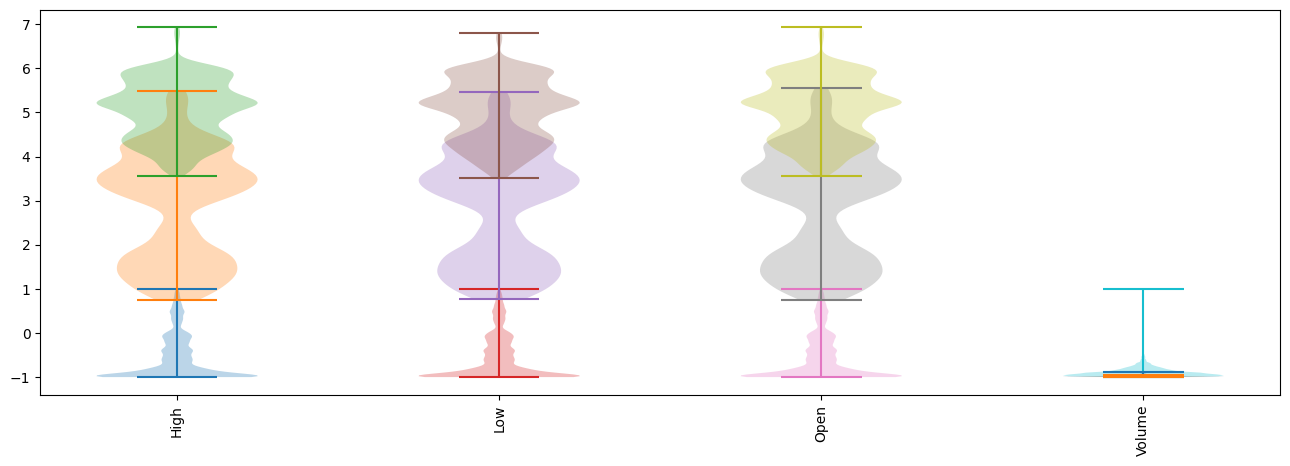

In [130]:
fig, ax = plt.subplots(figsize=(16, 5))
for i in range(1, df.shape[1]):
  ax.violinplot(dataset=x_tr_s[:, :, i].flatten(), positions=[i])
  ax.violinplot(dataset=x_vl_s[:, :, i].flatten(), positions=[i])
  ax.violinplot(dataset=x_ts_s[:, :, i].flatten(), positions=[i])

ax.set_xticks(list(range(df.shape[1])))
ax.set_xticklabels(df.keys(), rotation=90)
ax.autoscale()

[Text(1, 0, 'y (output)')]

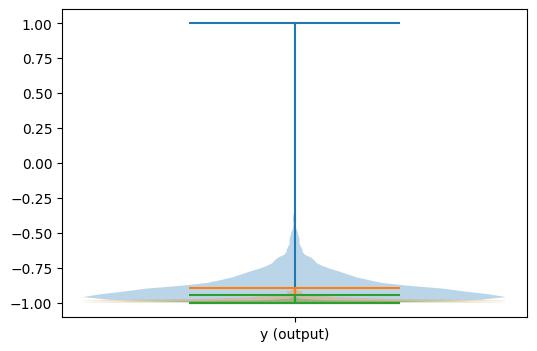

In [131]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.violinplot(dataset=y_tr_s.flatten())
ax.violinplot(dataset=y_vl_s.flatten())
ax.violinplot(dataset=y_ts_s.flatten())

ax.set_xticks([1])
ax.set_xticklabels(['y (output)'])

## 6. Creación y entrenamiento del modelo

- Entradas: arreglos *x* (batches x input-length  x features = batches x 24 x 1)
- Salidas: arreglos *y* (batches x output-length x features = batches x 1 x 1)

Usaremos la raíz cuadrada del error cuadrático medio (o RMSE por sus siglas en Inglés: *root mean square error*) como pérdida para entrenar el modelo:

$RMSE = \sqrt{\frac{\sum_i (y_i-\hat{y_i})^2}{N}}$

donde:
- $y$: temperatura real
- $\hat{y}$: temperatura predicha
- $N$: cantidad de predicciones

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

# Adjust parameters for training
tf.random.set_seed(42)
tf.config.experimental.enable_op_determinism()

# Model
N_UNITS = 128 # Size of hidden layer (h) and the memory cell(c)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2])

model = Sequential()
model.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
model.add(Dense(OUTPUT_LENGTH, activation='linear'))

# loss function
def root_mean_squared_error(y_true, y_pred):
  return tf.math.sqrt(tf.math.reduce_mean(tf.math.square(y_pred - y_true)))

# Compilation
optimizer = RMSprop(learning_rate=5e-5)
model.compile(
  optimizer=optimizer,
  loss=root_mean_squared_error
)

# Training
EPOCHS = 160
BATCH_SIZE = 256
history = model.fit(
  x = x_tr_s,
  y = y_tr_s,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  validation_data=(x_vl_s, y_vl_s),
  verbose=2
)

Epoch 1/160
20/20 - 4s - loss: 0.8928 - val_loss: 0.8755 - 4s/epoch - 191ms/step
Epoch 2/160
20/20 - 1s - loss: 0.7817 - val_loss: 0.9379 - 869ms/epoch - 43ms/step
Epoch 3/160
20/20 - 1s - loss: 0.6755 - val_loss: 0.9991 - 858ms/epoch - 43ms/step
Epoch 4/160
20/20 - 1s - loss: 0.5665 - val_loss: 1.0472 - 860ms/epoch - 43ms/step
Epoch 5/160
20/20 - 1s - loss: 0.4656 - val_loss: 1.0553 - 868ms/epoch - 43ms/step
Epoch 6/160
20/20 - 1s - loss: 0.3881 - val_loss: 0.9676 - 886ms/epoch - 44ms/step
Epoch 7/160
20/20 - 1s - loss: 0.3265 - val_loss: 0.8157 - 870ms/epoch - 44ms/step
Epoch 8/160
20/20 - 1s - loss: 0.2639 - val_loss: 0.6499 - 877ms/epoch - 44ms/step
Epoch 9/160
20/20 - 1s - loss: 0.1984 - val_loss: 0.4731 - 861ms/epoch - 43ms/step
Epoch 10/160
20/20 - 1s - loss: 0.1373 - val_loss: 0.3231 - 1s/epoch - 69ms/step
Epoch 11/160
20/20 - 2s - loss: 0.0957 - val_loss: 0.2023 - 2s/epoch - 75ms/step
Epoch 12/160
20/20 - 1s - loss: 0.0777 - val_loss: 0.1431 - 1s/epoch - 72ms/step
Epoch 13/160

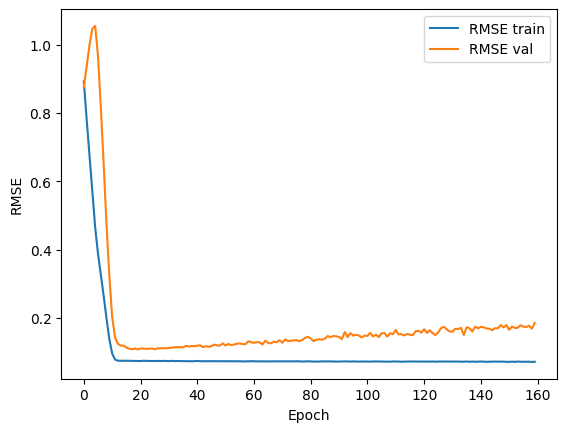

In [133]:
# Plot training and validation curves to check that there is no overfitting
plt.plot(history.history['loss'], label='RMSE train')
plt.plot(history.history['val_loss'], label='RMSE val')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

**Observaciones y sugerencias:**

- El modelo con entradas multivariadas parece tener un desempeño inferior en comparación con los modelos univariados (RMSEs del orden del 10% vs 1-2% en los casos anteriores)
- Lo anterior puede indicar:
  - Que el uso de multivariables podría empeorar la predicción
  - Que no todas las variables son relevantes
  - Sugerencia: jacer un análisis de relevancia de las variables (_feature importance_) y entrenar el modelo solo con aquellas más relevantes.
- Se sugiere afinar el modelo modificando varios de sus hiperparámetros y usando técnicas como, por ejemplo, *random grid search*. Los hiperparámetros a afinar pueden ser:
  - *INPUT_LENGTH* (esto implica modificar la fase de pre-procesamiento)
  - Número de unidades de la Red LSTM
  - Pérdida
  - Tasa de aprendizaje
  - Epochs
  - Batch size


### Desempeño del modelo

In [134]:
rmse_tr = model.evaluate(x_tr_s, y_tr_s, verbose=0)
rmse_vl = model.evaluate(x_vl_s, y_vl_s, verbose=0)
rmse_ts = model.evaluate(x_ts_s, y_ts_s, verbose=0)

print('Performances:')
print('\tTrain RMSE: %.3f' % rmse_tr)
print('\tValidation RMSE: %.3f' % rmse_vl)
print('\tTest RMSE: %.3f' % rmse_ts)

Performances:
	Train RMSE: 0.057
	Validation RMSE: 0.178
	Test RMSE: 0.348


Los desempeños son comparables lo cual quiere decir que el modelo generaliza bastante bien.

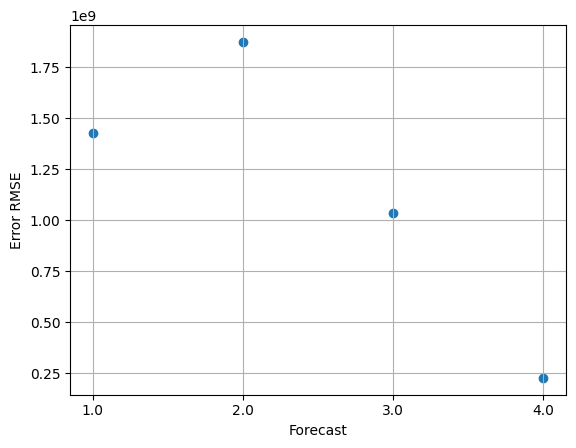

In [135]:
# Generate predictions over test set
y_ts_pred_s = model.predict(x_ts_s, verbose=0)
y_ts_pred = scaler.inverse_transform(y_ts_pred_s)

# calc RMSE for each predicted instants of time
diff_square = np.square(y_ts.squeeze() - y_ts_pred)
proms = np.mean(diff_square, axis=0)
rmse = np.sqrt(proms)

t = np.linspace(1, 4, 4)

fig, ax = plt.subplots()
ax.scatter(t, rmse)
ax.set_xlabel('Forecast')
ax.set_ylabel('Error RMSE')
plt.xticks(ticks=t, labels=t)
plt.grid()

### Predicciones con el modelo entrenado

In [136]:
def predict(x, model, scaler):
  '''Genera la predicción de OUTPUT_LENGTH instantes
  de tiempo a futuro con el modelo entrenado.

  Entrada:
  - x: batch (o batches) de datos para ingresar al modelo
    (tamaño: BATCHES X INPUT_LENGTH X FEATURES)
  - model: Red LSTM entrenada
  - scaler: escalador (requerido para llevar la predicción a la escala original)

  Salida:
  - y_pred: la predicción en la escala original (tamaño: BATCHES X OUTPUT_LENGTH X FEATURES)
  '''

  y_pred_s = model.predict(x, verbose=0)
  y_pred = scaler.inverse_transform(y_pred_s)

  return y_pred.flatten()

In [137]:
# Calculate predictions over testing dataset
y_ts_pred = predict(x_ts_s, model, scaler)

Analicemos este desempeño gráficamente mostrando los precios originales y las predichas por el modelo para cada uno de los datos del set de prueba:

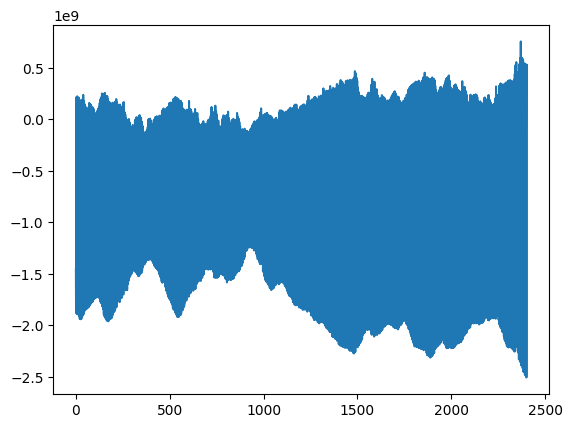

In [138]:
N = len(y_ts_pred)
ndata = np.linspace(1, N, N)

errors = y_ts.flatten() - y_ts_pred.flatten()
plt.plot(errors)

Se observa que:
- EL promedio de errors es cercano a cero.
- Hay bastantes instantes de tiempo donde se alcanzan errores de hasta -2000 y 3000 dólares de diferencia.